<a href="https://colab.research.google.com/github/okaystephen/DATASCI-MCO/blob/main/DATASCI_MCO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Cleaning

* clean column names (ira)
* clean kuwait (bly)
* clean mum to Mother (ira)
* clean lebanon (stephen)
* clean outlier in grade 7 (Anj)
* KW --> Kuwait (stephen)

# **Student's Academic Performance** 
#### *Members: Beaverly Cuasi, Allexandra Domingo, Angeline Gubat, Stephen Salamante, Ira Villanueva  (S12 - Couch Data Scientists)*
This notebook focuses on the Student's Academic Performance Dataset which can be found [here](https://www.kaggle.com/aljarah/xAPI-Edu-Datal). The first section shows the dataset information and dataset cleaning process, followed by data visualization using Exploratory Data Analysis (EDA). Lastly, this notebook aims to answer which factors affect a student’s academic grades. Specifically we wanted to know the following: <br><br>
  * Do students who participate more have higher grades than those who participate less?
  * Does parent participation and satisfaction affect a student’s performance?
  * Do the number of class absences greatly affect the student’s grades?
  * Does visiting class resources result in higher class grades?


### **Dataset Information**  
The Student's Performance Dataset is collected from Kalboard 360, a learning management, using a learner activity tracker tool called experience API (xAPI). The dataset contains **480** observations (rows) across 16 features (columns). Below is a brief description of each features:  
* **`gender`**: Student's gender <br>
* **`NationallTy`**: Student's nationality <br>
* **`PlaceofBirth`**: Student's place of birth <br>
* **`StageID`**: Educational level that student belongs to <br>
* **`GradeID`**: Grade level that student belongs to <br>
* **`SectionID`**: Classroom that student belongs to<br>
* **`Topic`**: Course topic <br>
* **`Semester`**: Current semester in a school year <br>
* **`Relation`**: Parent who is responsible for a student<br>
* **`raisedhands`**: Total number of times a student raises his/her hand  <br>
* **`VisITedResources`**: Total number of times a student visited a course content <br>
* **`AnnouncementsView`**: Total number of times a student checks the announcements <br>
* **`Discussion`**: Total number of times a student participates on discussion groups <br>
* **`ParentAnsweringSurvey`**: If a parent answered surveys provided by the school <br>
* **`ParentSchoolSatisfaction`**: If a parent is satisfied or not <br>
* **`StudentAbsenceDays`**: Total number of days that a student is absent <br>
* **`Class`**: Represents the interval of a student total grade <br>
  * _Low_: interval includes values from 0 to 69
  * _Middle_: interval includes values from 70 to 89
  * _High_: interval includes values from 90-100

Let's view the observations and features of the dataset. But first, let's import the needed libraries for this notebook.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Using `read_csv`, we will loading the dataset (xAPI-Edu-Data.csv) into a DataFrame.

In [3]:
url = 'https://raw.githubusercontent.com/okaystephen/DATASCI-MCO/main/xAPI-Edu-Data.csv'
spd_df = pd.read_csv(url)  

# First 5 rows in the dataset:
spd_df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


Let's see now its general information using info() function.

In [4]:
# Dataset's variables type:
spd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [ ]:
spd_df.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

We can see that there are no null values or missing values in any columns so there will be no problem in the dataset in handling null or NaN values. Before analyzing our data, let's further explore the dataset for data cleaning.  
### **Data Cleaning**  <br>
#### **Renaming feature names**  
When we viewed the information of the dataset, we saw that some column names doesn't have the same format. Some columns are all in lowercase while some letters are capitalized like `NationalITy` and `VisITedResources`. It is a good approach to rename columns to ones that can be easily recalled later on. Here are the columns that we will be renaming:  
* NationalITy --> Nationality
* PlaceofBirth --> BirthPlace
* VisITedResources --> VistedResources
* ParentschoolSatisfaction --> ParentSchoolSatisfaction
* raisedhands --> RaisedHands

In [5]:
spd_df.rename(columns={'NationalITy':'Nationality',
'PlaceofBirth': 'BirthPlace',
'gender': 'Gender',
'VisITedResources':'VisitedResources',
'ParentschoolSatisfaction':'ParentSchoolSatisfaction',
'raisedhands':'RaisedHands'}, inplace=True) 

Let's view the dataset with the renamed columns.

In [6]:
spd_df.head()

,Gender,Nationality,BirthPlace,StageID,GradeID,SectionID,Topic,Semester,Relation,RaisedHands,VisitedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentSchoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


#### **Renaming Mum to Mother in Relation Column**  
It's also important to ensure that the data values is consistent and uniformed within the dataset especially inside a feature column. Let's check the `Relation` column in the dataset and view its unique values.  

In [7]:
spd_df['Relation'].unique()

array(['Father', 'Mum'], dtype=object)

For uniformity, we will be renaming Mum to Mother.

In [8]:
spd_df['Relation'].replace({'Mum':'Mother'}, inplace=True)
spd_df['Relation'].unique()

array(['Father', 'Mother'], dtype=object)

#### **Renaming countries from the `BirthPlace` column**  

Let's turn `lebanon` into `Lebanon`.

In [9]:
spd_df.replace({'BirthPlace': {'lebanon': 'Lebanon'}}, inplace=True)

In [10]:
spd_df['BirthPlace'].unique()

array(['KuwaIT', 'Lebanon', 'Egypt', 'SaudiArabia', 'USA', 'Jordan',
       'venzuela', 'Iran', 'Tunis', 'Morocco', 'Syria', 'Iraq',
       'Palestine', 'Lybia'], dtype=object)

#### **Renaming countries from the `Nationality` column**  

Let's turn `KW` into `Kuwait`.

In [26]:
spd_df[spd_df['Nationality'] == 'KW'] = 'Kuwait' 

In [27]:
spd_df['Nationality'].unique()

array(['Kuwait', 'lebanon', 'Egypt', 'SaudiArabia', 'USA', 'Jordan',
       'venzuela', 'Iran', 'Tunis', 'Morocco', 'Syria', 'Palestine',
       'Iraq', 'Lybia'], dtype=object)

In [ ]:
spd_df

,Gender,Nationality,BirthPlace,StageID,GradeID,SectionID,Topic,Semester,Relation,RaisedHands,VisitedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentSchoolSatisfaction,StudentAbsenceDays,Class
0,Kuwait,Kuwait,Kuwait,Kuwait,Kuwait,Kuwait,Kuwait,Kuwait,Kuwait,Kuwait,Kuwait,Kuwait,Kuwait,Kuwait,Kuwait,Kuwait,Kuwait
1,Kuwait,Kuwait,Kuwait,Kuwait,Kuwait,Kuwait,Kuwait,Kuwait,Kuwait,Kuwait,Kuwait,Kuwait,Kuwait,Kuwait,Kuwait,Kuwait,Kuwait
2,Kuwait,Kuwait,Kuwait,Kuwait,Kuwait,Kuwait,Kuwait,Kuwait,Kuwait,Kuwait,Kuwait,Kuwait,Kuwait,Kuwait,Kuwait,Kuwait,Kuwait
3,Kuwait,Kuwait,Kuwait,Kuwait,Kuwait,Kuwait,Kuwait,Kuwait,Kuwait,Kuwait,Kuwait,Kuwait,Kuwait,Kuwait,Kuwait,Kuwait,Kuwait
4,Kuwait,Kuwait,Kuwait,Kuwait,Kuwait,Kuwait,Kuwait,Kuwait,Kuwait,Kuwait,Kuwait,Kuwait,Kuwait,Kuwait,Kuwait,Kuwait,Kuwait
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


### **Exploratory Analysis**  
Now that we have cleaned our dataset, we can now proceed in analyzing our data and conduct exploratory analysis to understand the dataset further. As mentioned, we aim to know which factors affect student's academic grades specifically we want to address the following questions:  
* Do students who participate more have higher grades than those who participate less?
* Does parent participation and satisfaction affect a student’s performance?
* Do the number of class absences greatly affect the student’s grades?
* Does visiting class resources result in higher class grades?

#### ***Q1: Do students who participate more have higher grades than those who participate less?***  
Student engagement has been defined as “students’ willingness, need, desire, and compulsion to participate in, and be successful in, the learning process”. 
For the first question, we wanted to know if there is a correlation on the student's participation and academic performance. With this, we will be using the following features:  
* `AnnouncementsView`: Total number of times a student checks the announcements<br>
* `Discussion`: Total number of times a student participates on discussion groups<br>
* `RaisedHands`: Total number of times a student raises his/her hand  <br>
* `Class`: Represents the interval of a student total grade <br>
  * _Low_: interval includes values from 0 to 69
  * _Middle_: interval includes values from 70 to 89
  * _High_: interval includes values from 90-100
  
To start, let us assign to a DataFrame variable the needed features for this research question. 

In [25]:
q1_df = spd_df[["Gender", "AnnouncementsView", "Discussion", "RaisedHands", "Class"]].copy()
q1_df

,Gender,AnnouncementsView,Discussion,RaisedHands,Class
0,M,2,20,15,M
1,M,3,25,20,M
2,M,0,30,10,L
3,M,5,35,30,L
4,M,12,50,40,M
...,...,...,...,...,...
475,F,5,8,5,L
476,F,14,28,50,M
477,F,25,29,55,M
478,F,14,57,30,L


Now, let's try visualizing the relationship between the variables `RaisedHands` and `Class` using a bar plot.

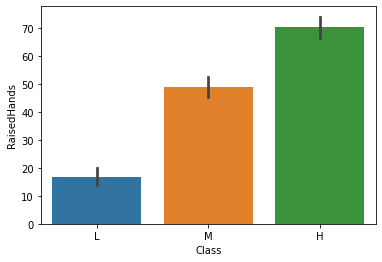

In [26]:
sns.barplot(x="Class", y="RaisedHands", order=["L", "M", "H"], data=q1_df)

We can see from the figure above that students with higher grades tends to raised their hands in class than those who have lower grades. Let's try to visualize if this will also be the case when it comes to participation in discussion and viewing of announcements.

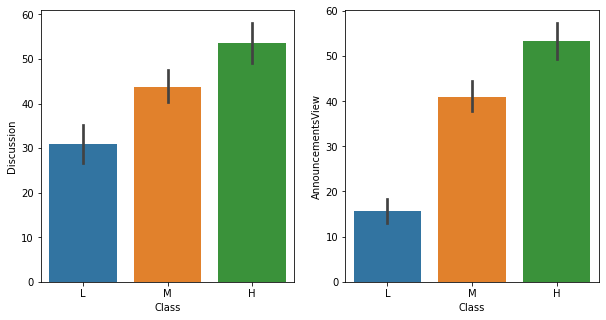

In [28]:
fig, axarr  = plt.subplots(1,2,figsize=(10,5))
sns.barplot(x='Class', y='Discussion', order=['L','M','H'], data=q1_df,  ax=axarr[0])
sns.barplot(x='Class', y='AnnouncementsView', order=['L','M','H'], data=q1_df, ax=axarr[1])

Students who also participates in discussions more often as well as check announcements tend to have a better academic performance. 

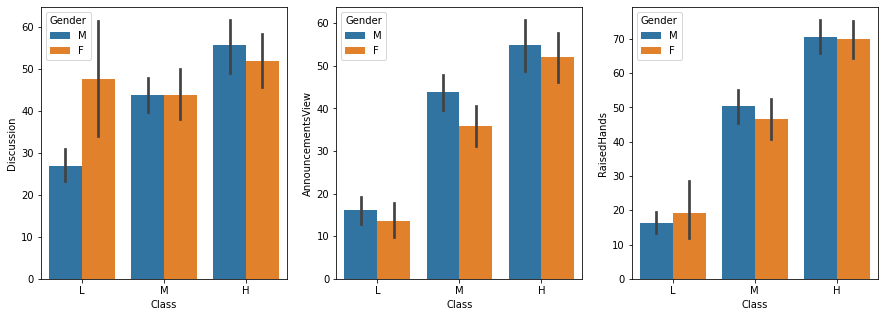

In [30]:
fig, axarr  = plt.subplots(1,3,figsize=(15,5))
sns.barplot(x='Class', y='Discussion', hue="Gender", order=['L','M','H'], data=q1_df,  ax=axarr[0])
sns.barplot(x='Class', y='AnnouncementsView', hue="Gender", order=['L','M','H'], data=q1_df, ax=axarr[1])
sns.barplot(x="Class", y="RaisedHands", hue="Gender", order=["L", "M", "H"], data=q1_df, ax=axarr[2])

#### ***Q2: Does parent participation and satisfaction affect a student’s performance?***

#### ***Q3: Do the number of class absences greatly affect the student’s grades??***

#### ***Q4: Does visiting class resources result in higher class grades??***